In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

## 1번 양재형

In [ ]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [ ]:
df['연령대'] = [age_code[i] for i in df['연령대코드(5세단위)']]
df.groupby("연령대")["허리둘레"].describe().reset_index()

,연령대,count,mean,std,min,25%,50%,75%,max
0,20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
1,25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
2,30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
3,35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
4,40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
5,45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
6,50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
7,55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
8,60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0
9,65~69세,53624.0,83.588500,8.443542,50.0,78.0,83.5,89.0,129.0


## 2번 권은서

<Axes: >

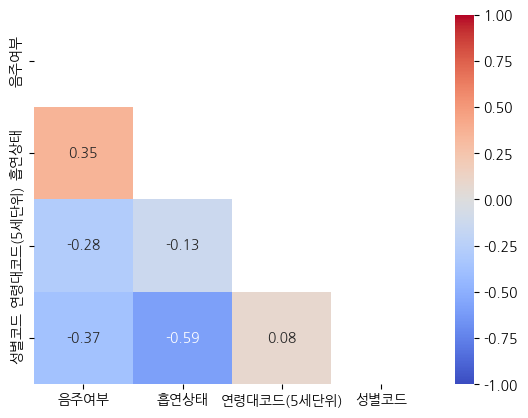

In [ ]:
df_corr = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]].corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask,
            vmin=-1, vmax=1, cbar_kws={"ticks": np.arange(-1, 1.25, 0.25)})

## 3번 이윤진

4번 신지예

<ipython-input-8-fed69c53fd98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_120['흡연상태'] = df_120['흡연상태'].replace(smoke)
<ipython-input-8-fed69c53fd98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_120['음주여부'] = df_120['음주여부'].replace(drink)


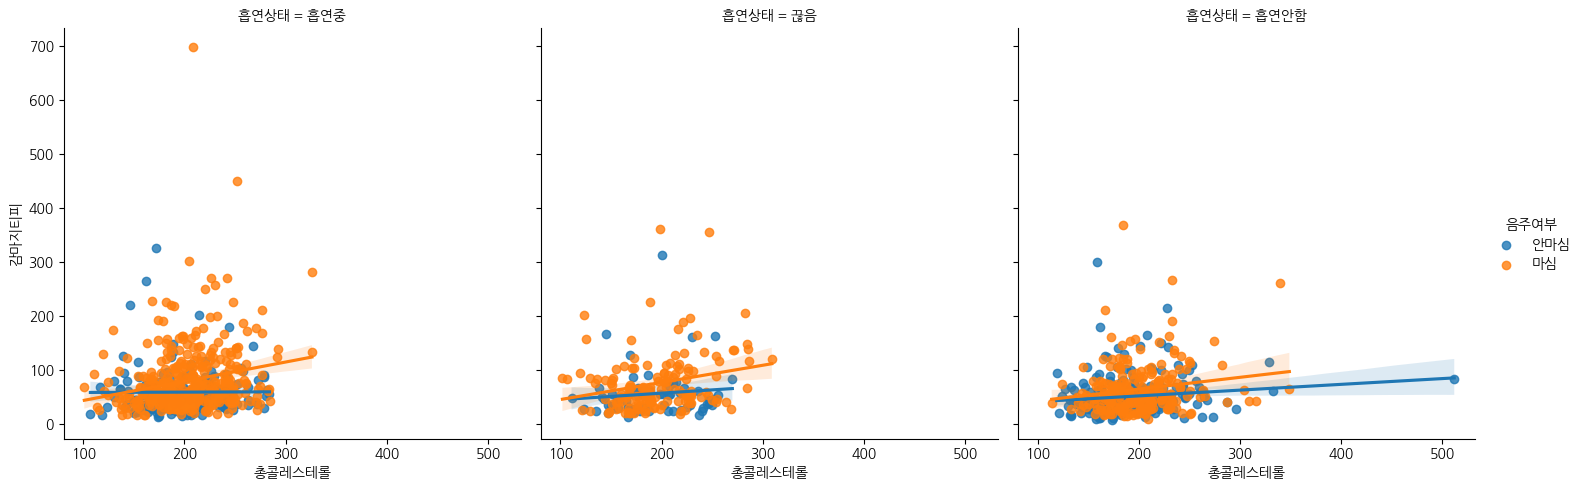

In [ ]:
df_120 = df[df['체중(5Kg 단위)'] >= 120]

smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df_120['흡연상태'] = df_120['흡연상태'].replace(smoke)
df_120['음주여부'] = df_120['음주여부'].replace(drink)

sns.lmplot(data=df_120, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")

## 5번 김상은

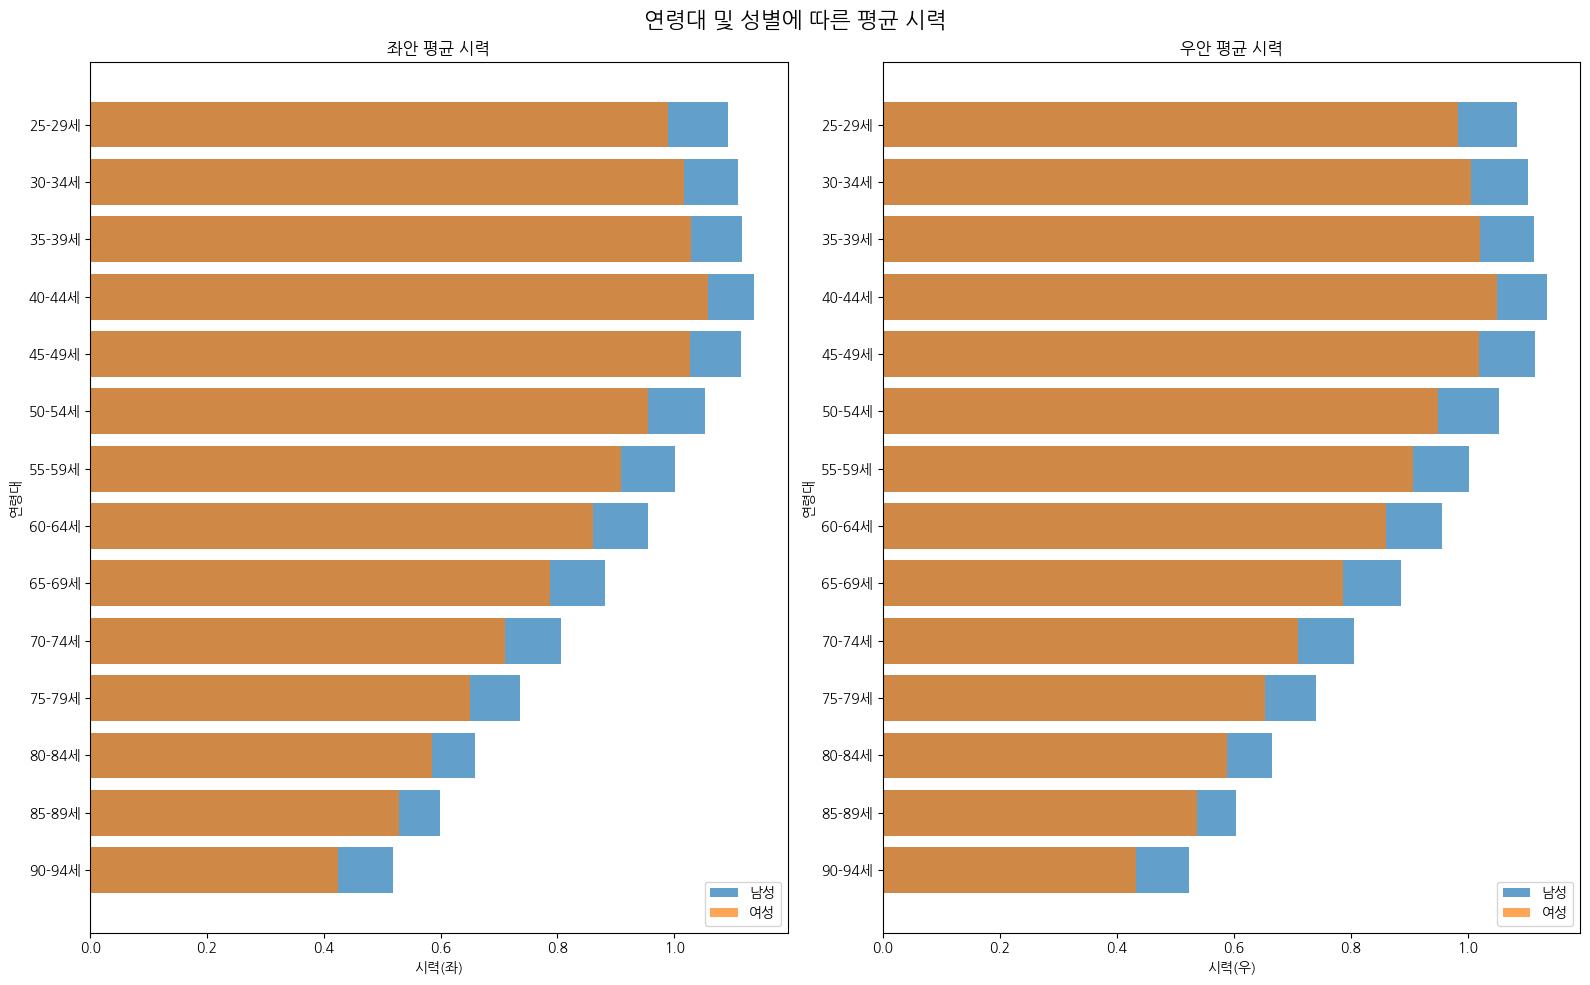

In [ ]:
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949", usecols=['연령대코드(5세단위)', '성별코드', '시력(좌)', '시력(우)'])

# 연령대 분류 함수
def categorize_age(age_code):
    age = age_code * 5
    return f"{age}-{age+4}세"

# 데이터 전처리
df['age_group'] = df['연령대코드(5세단위)'].apply(categorize_age)
df['gender'] = df['성별코드'].map({1: '남성', 2: '여성'})

# 실명 데이터와 유효하지 않은 시력 데이터 제외
df_filtered = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9) &
                 (df['시력(좌)'] >= 0.1) & (df['시력(좌)'] <= 2.5) &
                 (df['시력(우)'] >= 0.1) & (df['시력(우)'] <= 2.5)]

# 평균 시력 계산
df_avg = df_filtered.groupby(['age_group', 'gender'])[['시력(좌)', '시력(우)']].mean().reset_index()

# 그래프 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('연령대 및 성별에 따른 평균 시력', fontsize=16)

# 좌안 시력 그래프
df_avg_sorted = df_avg.sort_values('age_group', ascending=False)
ax1.barh(df_avg_sorted[df_avg_sorted['gender'] == '남성']['age_group'],
         df_avg_sorted[df_avg_sorted['gender'] == '남성']['시력(좌)'],
         label='남성', alpha=0.7)
ax1.barh(df_avg_sorted[df_avg_sorted['gender'] == '여성']['age_group'],
         df_avg_sorted[df_avg_sorted['gender'] == '여성']['시력(좌)'],
         label='여성', alpha=0.7)
ax1.set_title('좌안 평균 시력')
ax1.set_xlabel('시력(좌)')
ax1.set_ylabel('연령대')
ax1.legend()

# 우안 시력 그래프
ax2.barh(df_avg_sorted[df_avg_sorted['gender'] == '남성']['age_group'],
         df_avg_sorted[df_avg_sorted['gender'] == '남성']['시력(우)'],
         label='남성', alpha=0.7)
ax2.barh(df_avg_sorted[df_avg_sorted['gender'] == '여성']['age_group'],
         df_avg_sorted[df_avg_sorted['gender'] == '여성']['시력(우)'],
         label='여성', alpha=0.7)
ax2.set_title('우안 평균 시력')
ax2.set_xlabel('시력(우)')
ax2.set_ylabel('연령대')
ax2.legend()

plt.tight_layout()
plt.show()

# 5번 박시연

In [ ]:
# 필요한 컬럼만 추출해 eyesight_left/right에 저장
eyesight_left = df[["연령대코드(5세단위)", "성별코드", '시력(좌)']].copy()
eyesight_right = df[["연령대코드(5세단위)", "성별코드", '시력(우)']].copy()

In [ ]:
# 실명자 데이터를 blind_left/right에 저장
blind_left = eyesight_left[(eyesight_left['시력(좌)'] == 9.9)].copy()
blind_right = eyesight_right[(eyesight_right['시력(우)'] == 9.9)].copy()

In [ ]:
# eyesight에서 blind를 삭제
print("삭제 전 :", eyesight_left.shape)
eyesight_left = eyesight_left.drop(blind_left.index)
eyesight_right = eyesight_right.drop(blind_right.index)
print("삭제 후 :",eyesight_left.shape)
eyesight_left

삭제 전 : (1000000, 3)
삭제 후 : (996793, 3)


,연령대코드(5세단위),성별코드,시력(좌)
0,13,1,1.0
1,8,2,1.2
2,8,1,1.0
3,12,2,0.9
4,8,1,1.5
...,...,...,...
999995,9,2,1.5
999996,9,2,1.2
999997,12,2,0.2
999998,11,1,0.8


In [ ]:
# 연령대, 성별 좌우 평균 시력 데이터를 eyesight_mean에 저장
eyesight_left_mean = eyesight_left.pivot_table(index="연령대코드(5세단위)", columns="성별코드", values="시력(좌)", aggfunc="mean")
eyesight_right_mean = eyesight_right.pivot_table(index="연령대코드(5세단위)", columns="성별코드", values="시력(우)", aggfunc="mean")
eyesight_left_mean

성별코드,1,2
연령대코드(5세단위),,
5,1.092088,0.989020
6,1.108807,1.016223
7,1.116810,1.028945
8,1.137300,1.057884
9,1.115202,1.027259
10,1.052915,0.955033
11,1.002117,0.909677
12,0.954576,0.860812
13,0.880873,0.787469


In [ ]:
# 연령대코드를 실제 연령대로 변경
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}
eyesight_left_mean.index = eyesight_left_mean.index.map(age_code)
eyesight_right_mean.index = eyesight_right_mean.index.map(age_code)

# '연령대코드(5세단위)' 인덱스명을 '연령대'로 변경
eyesight_left_mean.index.name = "연령대"
eyesight_right_mean.index.name = "연령대"
eyesight_left_mean

성별코드,1,2
연령대,,
20~24세,1.092088,0.989020
25~29세,1.108807,1.016223
30~34세,1.116810,1.028945
35~39세,1.137300,1.057884
40~44세,1.115202,1.027259
45~49세,1.052915,0.955033
50~54세,1.002117,0.909677
55~59세,0.954576,0.860812
60~64세,0.880873,0.787469


In [ ]:
# 다차원 구조 풀어주기
eyesight_left_mean = eyesight_left_mean.reset_index()
eyesight_right_mean = eyesight_right_mean.reset_index()
eyesight_left_mean

성별코드,연령대,1,2
0,20~24세,1.092088,0.989020
1,25~29세,1.108807,1.016223
2,30~34세,1.116810,1.028945
3,35~39세,1.137300,1.057884
4,40~44세,1.115202,1.027259
5,45~49세,1.052915,0.955033
6,50~54세,1.002117,0.909677
7,55~59세,0.954576,0.860812
8,60~64세,0.880873,0.787469
9,65~69세,0.805634,0.710081


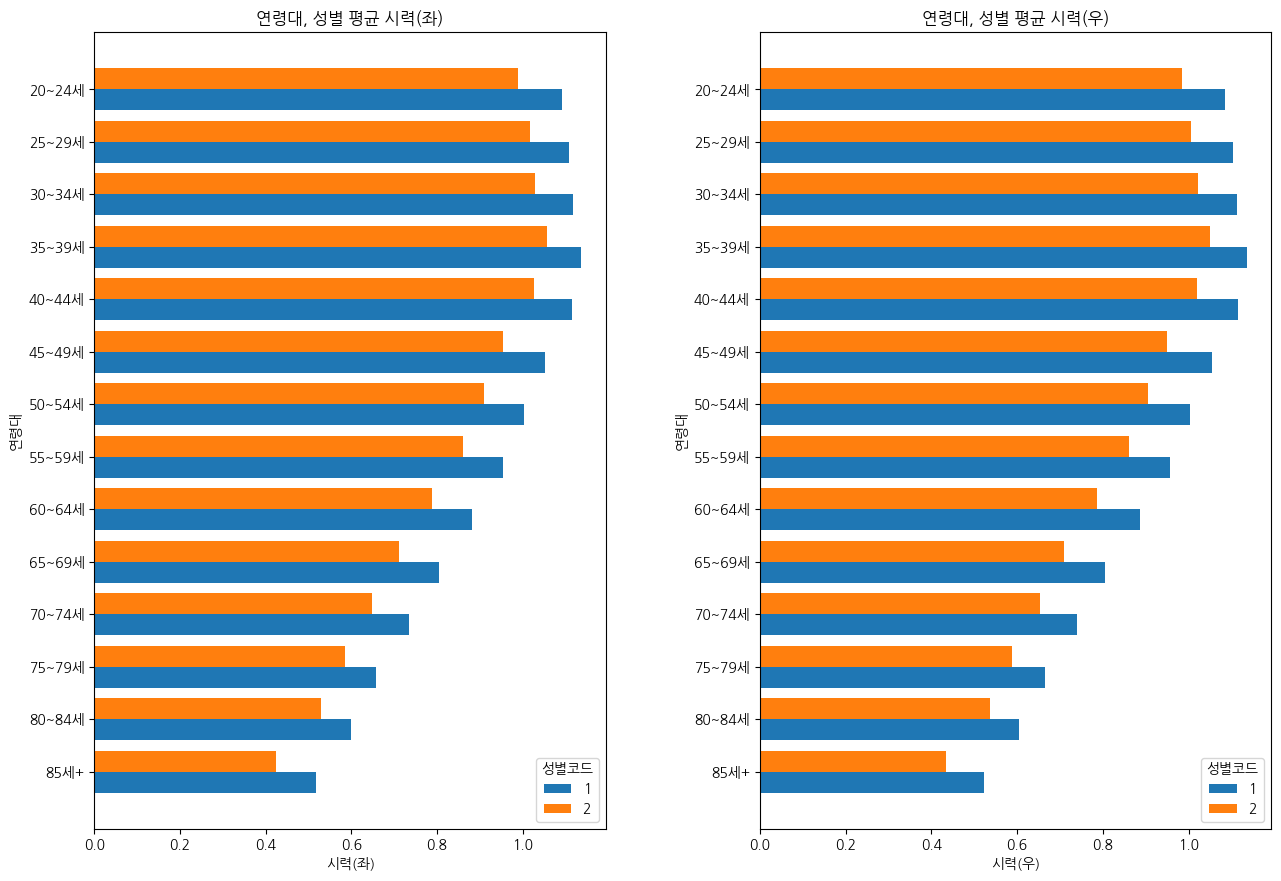

In [ ]:
import matplotlib.pyplot as plt

# 데이터 설정
age_groups = eyesight_left_mean['연령대']
male_eyesight_left = eyesight_left_mean[1]
female_eyesight_left = eyesight_left_mean[2]
male_eyesight_right = eyesight_right_mean[1]
female_eyesight_right = eyesight_right_mean[2]

# 막대의 위치 설정
y = np.arange(len(age_groups))[::-1]
bar_width = 0.4  # 막대의 너비 설정

# 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# 시력(좌)
axs[0].barh(y - bar_width/2, male_eyesight_left, height=bar_width, label='1')
axs[0].barh(y + bar_width/2, female_eyesight_left, height=bar_width, label='2')
axs[0].set_yticks(y)
axs[0].set_yticklabels(age_groups)
axs[0].set_xlabel('시력(좌)')
axs[0].set_ylabel('연령대')
axs[0].set_title('연령대, 성별 평균 시력(좌)')
axs[0].legend(loc='lower right', title='성별코드')

# 시력(우)
axs[1].barh(y - bar_width/2, male_eyesight_right, height=bar_width, label='1')
axs[1].barh(y + bar_width/2, female_eyesight_right, height=bar_width, label='2')
axs[1].set_yticks(y)
axs[1].set_yticklabels(age_groups)
axs[1].set_xlabel('시력(우)')
axs[1].set_ylabel('연령대')
axs[1].set_title('연령대, 성별 평균 시력(우)')
axs[1].legend(loc='lower right', title='성별코드')

# 그래프간 간격 조정
plt.tight_layout(pad=5)

# 그래프 출력
plt.show()